compretition [https://www.kaggle.com/c/store-sales-time-series-forecasting/overview](https://www.kaggle.com/c/store-sales-time-series-forecasting/overview)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


In [47]:
train = pd.read_csv('./store-sales-time-series-forecasting/train.csv', index_col=['id'], parse_dates=["date"])
test = pd.read_csv('./store-sales-time-series-forecasting/test.csv', index_col=['id'])
stores = pd.read_csv('./store-sales-time-series-forecasting/stores.csv', index_col=['store_nbr'])

In [48]:
train = train.head(10000)

### pre proceso

In [54]:
family_names = list(train['family'].unique())
train['family'] = train['family'].astype('category')
train[family_names] = pd.get_dummies(train['family'])
train['index'] = train.index
train['date'] = pd.to_datetime(
    train['date'],
    errors = 'coerce', 
    format = '%m/%d/%Y %H:%M:%S:%p'
)

In [58]:
train = train.convert_dtypes()
train.dtypes
train.head()

,date,store_nbr,family,sales,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,...,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD,index
id,,,,,,,,,,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01-01,1,BABY CARE,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2013-01-01,1,BEAUTY,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,2013-01-01,1,BEVERAGES,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,2013-01-01,1,BOOKS,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4


In [51]:
train.columns


Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'AUTOMOTIVE',
       'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY',
       'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS',
       'GROCERY I', 'GROCERY II', 'HARDWARE', 'HOME AND KITCHEN I',
       'HOME AND KITCHEN II', 'HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR',
       'LAWN AND GARDEN', 'LINGERIE', 'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS',
       'PERSONAL CARE', 'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD',
       'index'],
      dtype='object')

In [67]:
from sklearn.linear_model import LinearRegression
# Training data
X = train[train['BEAUTY']==1].loc[:, [*family_names, 'index']] # features
y = train[train['BEAUTY']==1].loc[:, 'sales']  # target
 
# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [70]:
train[train['BEAUTY']==1][['index', 'sales']]

,index,sales
id,,
2,2,0.0
35,35,0.0
68,68,0.0
101,101,0.0
134,134,0.0
...,...,...
9836,9836,0.0
9869,9869,0.0
9902,9902,6.0


In [99]:
y_pred = pd.Series(model.predict(X))
y_pred.values


array([1.10628365, 1.11504365, 1.12380364, 1.13256364, 1.14132363,
       1.15008363, 1.15884362, 1.16760362, 1.17636361, 1.18512361,
       1.1938836 , 1.2026436 , 1.2114036 , 1.22016359, 1.22892359,
       1.23768358, 1.24644358, 1.25520357, 1.26396357, 1.27272356,
       1.28148356, 1.29024355, 1.29900355, 1.30776354, 1.31652354,
       1.32528353, 1.33404353, 1.34280352, 1.35156352, 1.36032351,
       1.36908351, 1.3778435 , 1.3866035 , 1.39536349, 1.40412349,
       1.41288348, 1.42164348, 1.43040347, 1.43916347, 1.44792346,
       1.45668346, 1.46544345, 1.47420345, 1.48296344, 1.49172344,
       1.50048343, 1.50924343, 1.51800342, 1.52676342, 1.53552341,
       1.54428341, 1.5530434 , 1.5618034 , 1.57056339, 1.57932339,
       1.58808338, 1.59684338, 1.60560337, 1.61436337, 1.62312336,
       1.63188336, 1.64064335, 1.64940335, 1.65816334, 1.66692334,
       1.67568333, 1.68444333, 1.69320332, 1.70196332, 1.71072331,
       1.71948331, 1.7282433 , 1.7370033 , 1.74576329, 1.75452

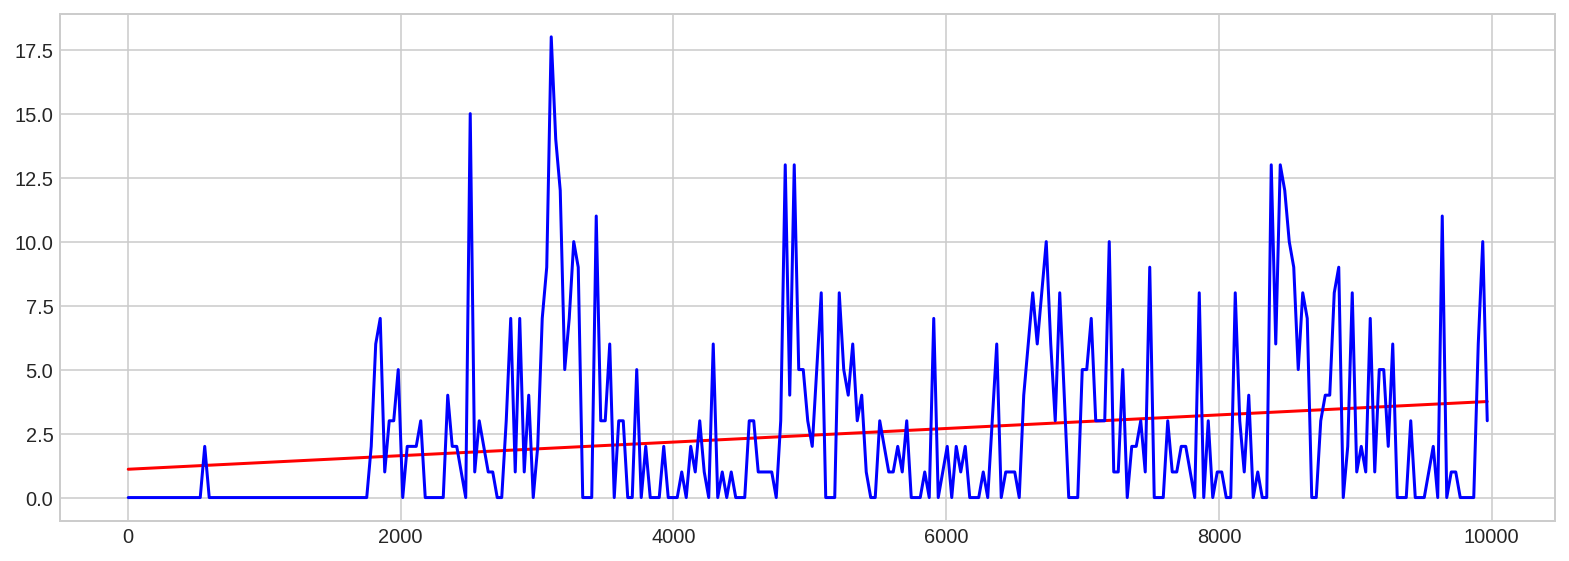

In [104]:
import matplotlib.pyplot as plt

# plt.plot(X['index'])
plt.plot(list(X['index'].values), list(y_pred.values), 'r')

plt.plot(list(train[train['BEAUTY']==1]['index']), list(train[train['BEAUTY']==1]['sales']), 'b')


# train[train['BEAUTY']==1].plot('index', 'sales', 'b')
plt.show()

ValueError: Unrecognized character a in format string

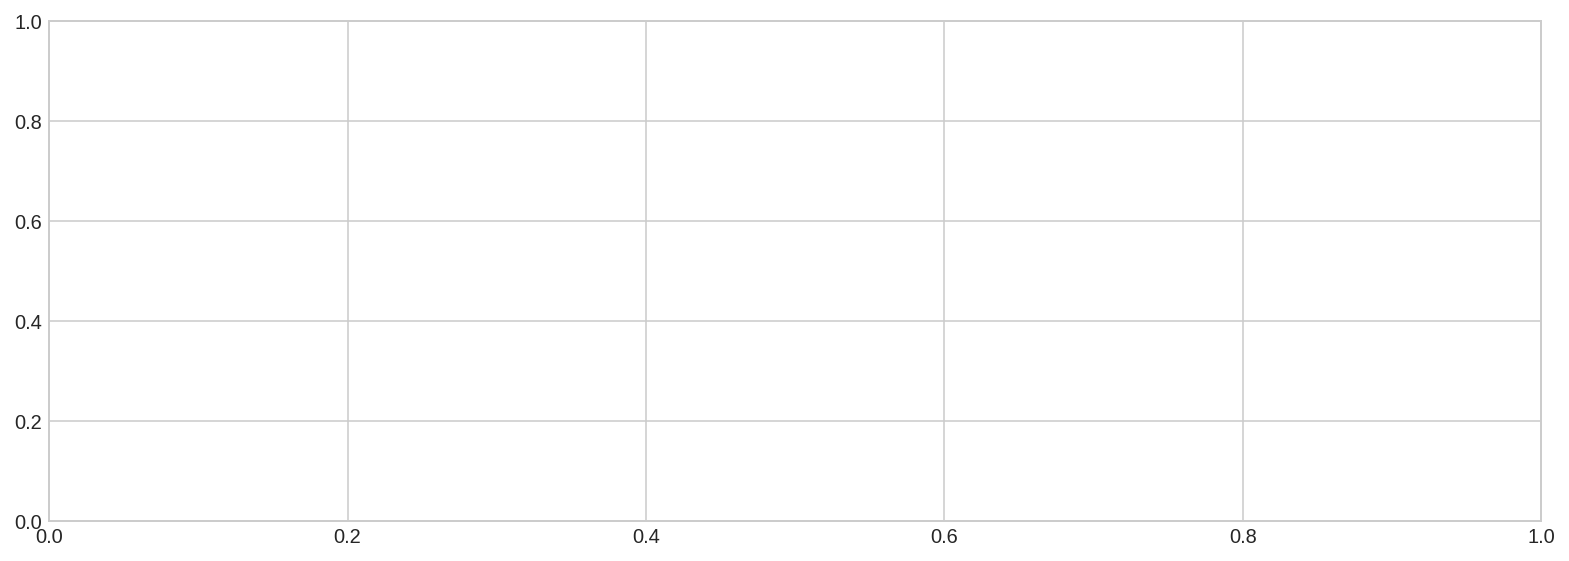

In [74]:
fig, ax = plt.subplots()
# ax.plot('index', 'sales', data=train, color='0.75')
ax.plot('index', 'sales', color='0.75')
# ax = sns.regplot(x='index', y='sales', data=train, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('time Plot of Hardcover Sales');

In [7]:
train.describe()

,store_nbr,sales,onpromotion,time
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00,1.500444e+06
std,1.558579e+01,1.101998e+03,1.221888e+01,8.662819e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00,7.502218e+05
50%,2.750000e+01,1.100000e+01,0.000000e+00,1.500444e+06
75%,4.100000e+01,1.958473e+02,0.000000e+00,2.250665e+06
max,5.400000e+01,1.247170e+05,7.410000e+02,3.000887e+06


In [8]:
train.tail(100)

,date,store_nbr,family,sales,onpromotion,time
id,,,,,,
3000788,2017-08-15,6,SEAFOOD,47.575,0,3000788
3000789,2017-08-15,7,AUTOMOTIVE,5.000,0,3000789
3000790,2017-08-15,7,BABY CARE,0.000,0,3000790
3000791,2017-08-15,7,BEAUTY,11.000,2,3000791
3000792,2017-08-15,7,BEVERAGES,3999.000,9,3000792
...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,3000883
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,3000884
3000885,2017-08-15,9,PRODUCE,2419.729,148,3000885
